In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
sns.set(rc={'figure.figsize': (16, 6)}, style="whitegrid")

•	Rank – место по объему продаж  
•	Name – название игры  
•	Platform – платформа, на которой выпущена игра  
•	Year – год релиза  
•	Genre – жанр  
•	Publisher – издатель  
•	NA_Sales – продажи в Северной Америке, в млн.  
•	EU_Sales – продажи в Европе, в млн.  
•	JP_Sales – продажи в Японии, в млн.  
•	Other_Sales – продажи в остальном мире, в млн.  
•	Global_Sales – продажи по всему миру, в млн.  

In [2]:
df = pd.read_csv('1_games.csv', encoding='utf-8')

EDA

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("report.html")

In [ ]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html("report.html")

In [ ]:
# единственный работающий на Python 3.12
import dtale
d = dtale.show(df)
d.open_browser()

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


1.	Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
df = df.dropna()

In [6]:
print(df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


2.	Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

In [12]:
df.Year = df.Year.astype('int')

C:\Users\MedTech\AppData\Local\Temp\ipykernel_10560\478137730.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
games_per_year = df['Year'].value_counts().sort_index()
games_per_year

Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     744
2005     936
2006    1008
2007    1201
2008    1428
2009    1431
2010    1257
2011    1136
2012     655
2013     546
2014     580
2015     614
2016     342
2017       3
2020       1
Name: count, dtype: int64

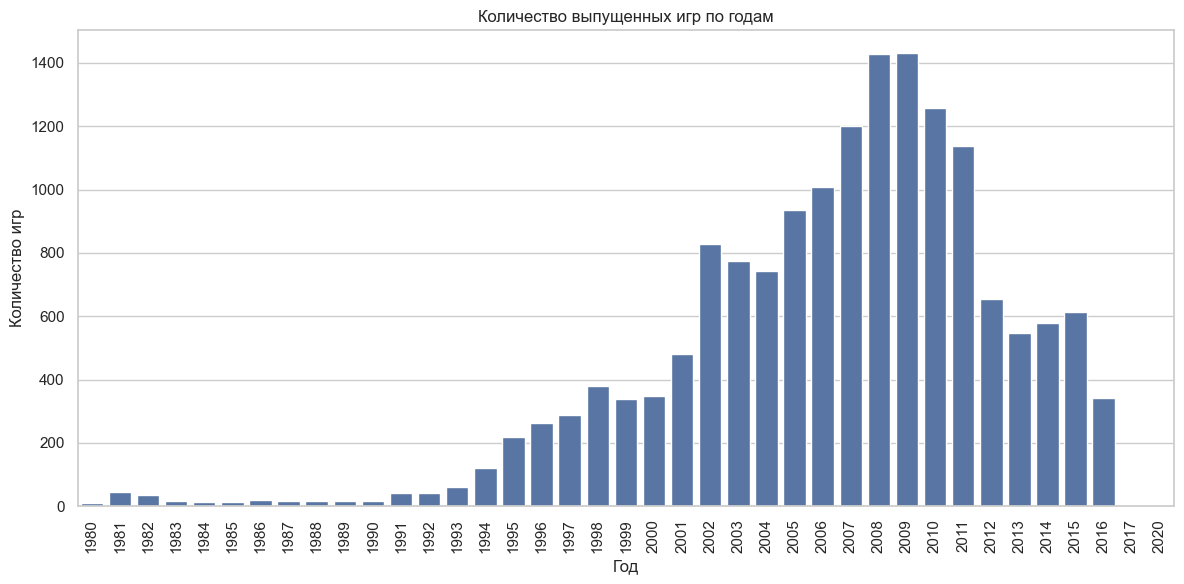

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=games_per_year.index, y=games_per_year.values)
plt.xticks(rotation=90)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.tight_layout()

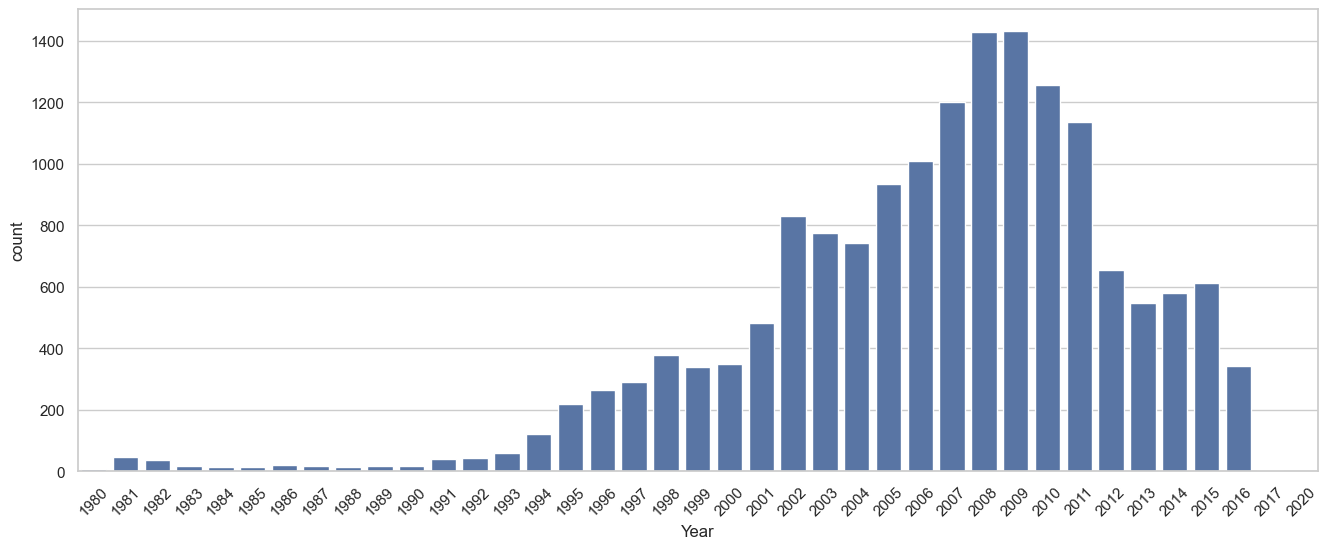

In [30]:
sns.countplot(x=df.Year)
plt.xticks(rotation=45);

In [ ]:
df['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [29]:
mode(df.Year)

ModeResult(mode=np.int64(2009), count=np.int64(1431))

3.	На каких платформах произошло больше всего релизов? Оставте названия только тех платформ, частото встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [33]:
# мое решение
platform = df['Platform'].value_counts().reset_index()
round(platform['count'] / platform['count'].sum() * 100,2).loc[lambda x: x > 7]

0    13.03
1    13.02
2     8.01
3     7.98
4     7.62
5     7.31
6     7.21
Name: count, dtype: float64

In [49]:

df.Platform.value_counts(normalize=True).mul(100).to_frame('pct').query('pct > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

4.	Игры каких издателей (Publisher) встречаются в датасете чаще всего? В качестве ответа укажите наибольшую абстолютную частоту встречаемости.

In [53]:
df.Publisher.value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [56]:
df['Publisher'].mode().iloc[0]

'Electronic Arts'

In [57]:
df.Publisher.describe()

count               16540
unique                578
top       Electronic Arts
freq                 1351
Name: Publisher, dtype: object

5.	Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандарстное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Ozer).  
В каком регионе медианное значение объема продаж игр Nintendo является наибольшим?  
Hint: mean, median, std. Переменные: NA_sales и т.д.для нужных регионов

In [5]:
df.loc[df.Publisher == 'Nintendo']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [14]:
df.loc[df.Publisher == 'Nintendo'][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].agg(['mean', 'median', 'std']).round(2)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,1.16,0.60,0.65,0.14,2.54
median,0.37,0.12,0.28,0.03,0.89
std,2.98,1.74,1.06,0.46,5.65


In [15]:
df.loc[df.Publisher == 'Nintendo'][['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,1.161977,0.595647,0.647824,0.135605,2.541337
std,2.976782,1.736095,1.059476,0.462002,5.653126
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.005000,0.000000,0.090000,0.000000,0.290000
50%,0.370000,0.120000,0.280000,0.030000,0.890000
75%,0.960000,0.480000,0.730000,0.090000,2.250000
max,41.490000,29.020000,10.220000,8.460000,82.740000


6.	Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. постройте боксплот, где по оси Х будет расположен жанр игры, а по оси У - объем продаж в Японии. Посмотрите на медиану, среднее, межквартильный размах.

In [37]:
df.loc[df.Publisher == 'Nintendo'][['JP_Sales', 'Genre']].groupby('Genre').agg({'JP_Sales': ['median', 'mean']}).round(2)

JP_Sales      
               median  mean
Genre                      
Action           0.17  0.37
Adventure        0.09  0.26
Fighting         0.50  0.83
Misc             0.25  0.55
Platform         0.52  0.91
Puzzle           0.26  0.50
Racing           0.34  0.79
Role-Playing     0.35  0.96
Shooter          0.12  0.23
Simulation       0.30  0.82
Sports           0.25  0.65
Strategy         0.18  0.33

In [38]:
df.loc[df.Publisher == 'Nintendo'][['JP_Sales', 'Genre']]\
    .groupby('Genre')\
    .agg(
        median=('JP_Sales','median'),
        mean=('JP_Sales','mean'),
        IQR=('JP_Sales', lambda x: x.quantile(.75) - x.quantile(.25))
    )\
    .round(2)

,median,mean,IQR
Genre,,,
Action,0.17,0.37,0.38
Adventure,0.09,0.26,0.20
Fighting,0.50,0.83,1.23
Misc,0.25,0.55,0.68
Platform,0.52,0.91,0.86
Puzzle,0.26,0.50,0.52
Racing,0.34,0.79,0.79
Role-Playing,0.35,0.96,0.58
Shooter,0.12,0.23,0.20


In [41]:
game_japan = df.loc[df.Publisher == 'Nintendo'][['JP_Sales', 'Genre']]
game_japan

,JP_Sales,Genre
0,3.77,Sports
1,6.81,Platform
2,3.79,Racing
3,3.28,Sports
4,10.22,Role-Playing
...,...,...
16269,0.01,Action
16357,0.01,Puzzle
16456,0.01,Misc
16473,0.01,Adventure


<Axes: xlabel='Genre', ylabel='JP_Sales'>

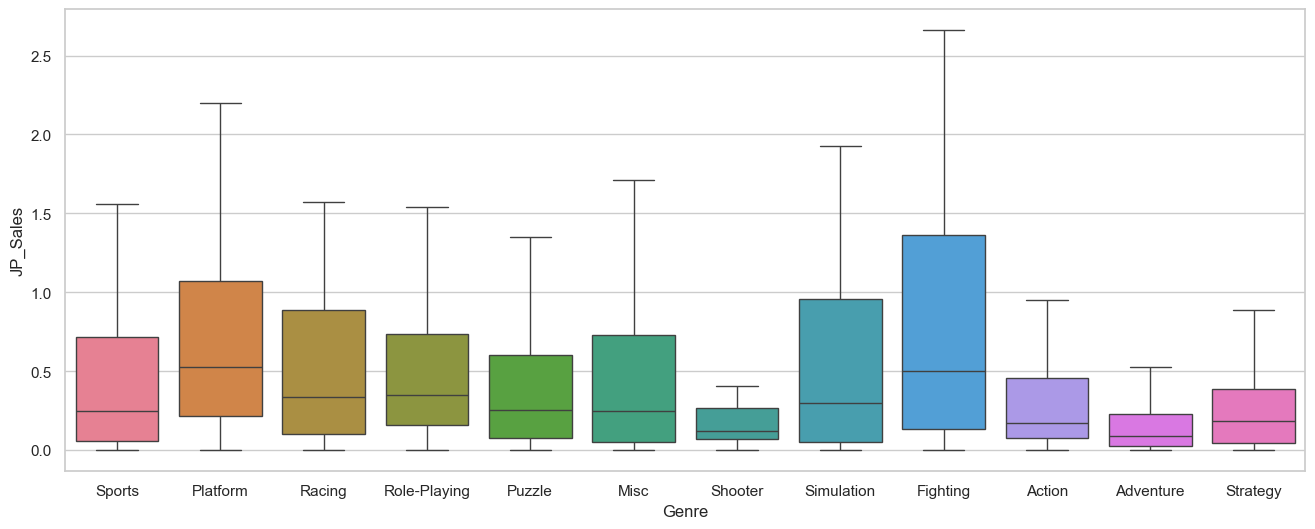

In [42]:
sns.boxplot(
    data=game_japan,
    x='Genre',
    y='JP_Sales',
    hue='Genre',     # разделить цветом
    showfliers=False # отключить выбросы
)

<Axes: xlabel='Genre', ylabel='JP_Sales'>

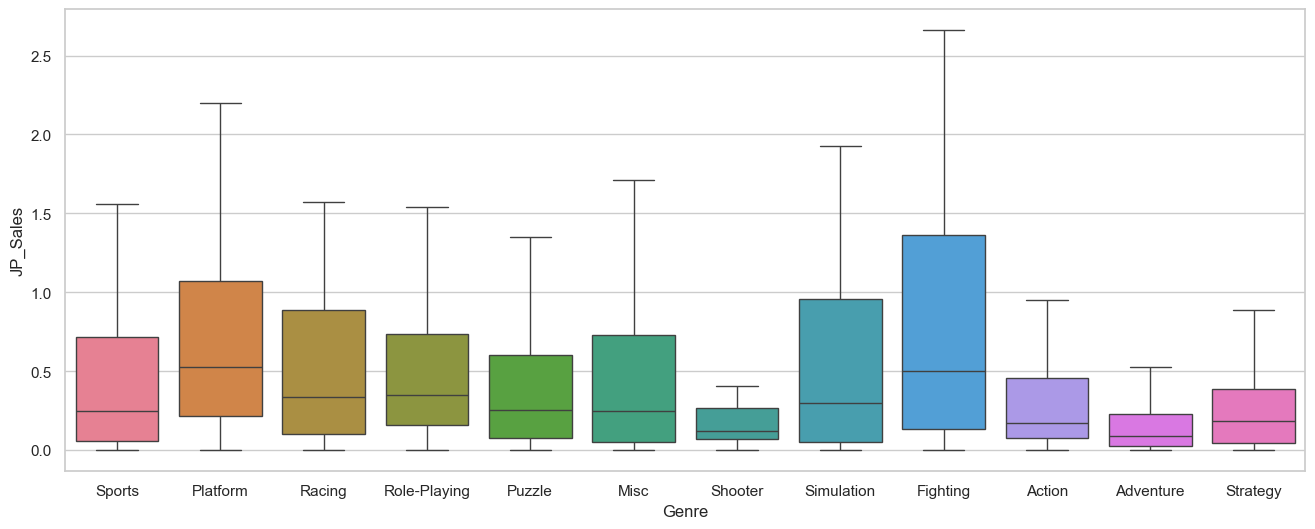

In [43]:
sns.boxplot(data=df.query("Publisher == 'Nintendo'"), x='Genre', y='JP_Sales', hue='Genre', showfliers=False)

<Axes: xlabel='Genre', ylabel='JP_Sales'>

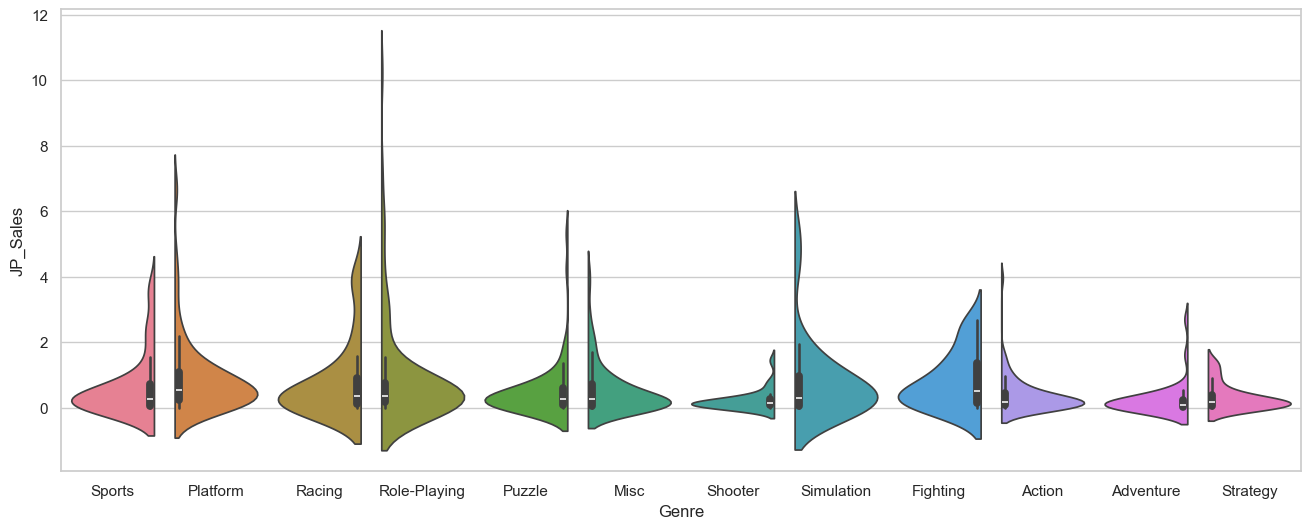

In [44]:
sns.violinplot(data=df.query("Publisher == 'Nintendo'"), x='Genre', y='JP_Sales', hue='Genre', split=True)

c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

<Axes: xlabel='Genre', ylabel='JP_Sales'>

c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


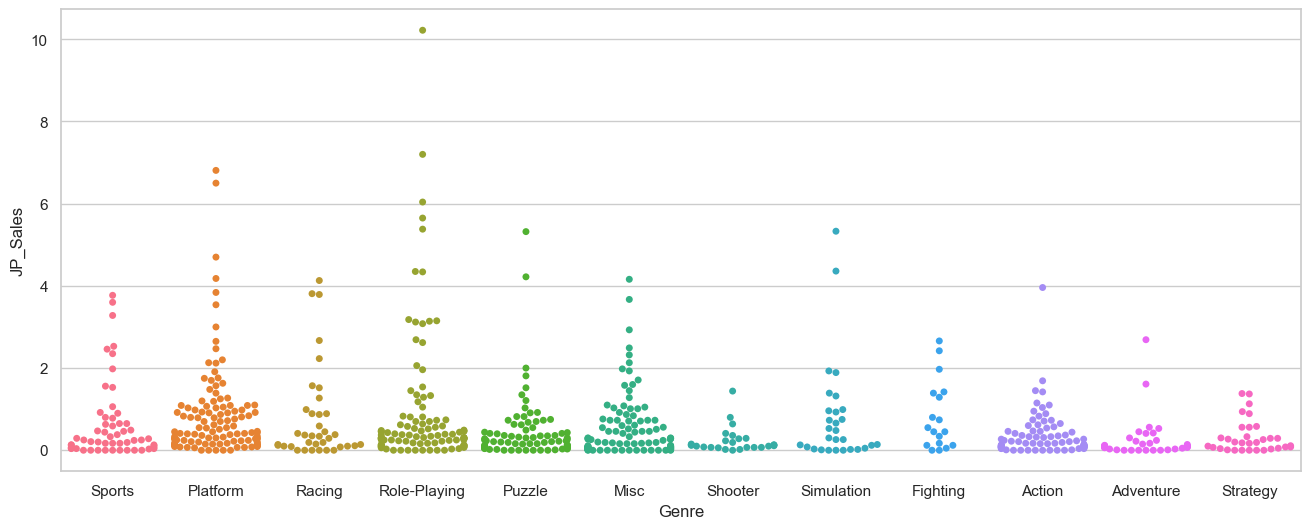

In [46]:
sns.swarmplot(data=df.query("Publisher == 'Nintendo'"), x='Genre', y='JP_Sales', hue='Genre')

7.	Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [18]:
nin_year = df.loc[df.Publisher == 'Nintendo'][['Global_Sales', 'Genre', 'Year']].groupby(['Genre', 'Year']).agg({'Global_Sales': 'sum'}).round(2).reset_index()
nin_year

,Genre,Year,Global_Sales
0,Action,1984,1.85
1,Action,1985,3.50
2,Action,1986,9.81
3,Action,1991,4.61
4,Action,1992,3.83
...,...,...,...
256,Strategy,2009,0.60
257,Strategy,2010,0.27
258,Strategy,2013,1.11
259,Strategy,2015,0.22


In [7]:
nin_year = (df.query("Publisher=='Nintendo'").query("Genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')").groupby(['Genre', 'Year']).Global_Sales.sum().reset_index())
nin_year

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


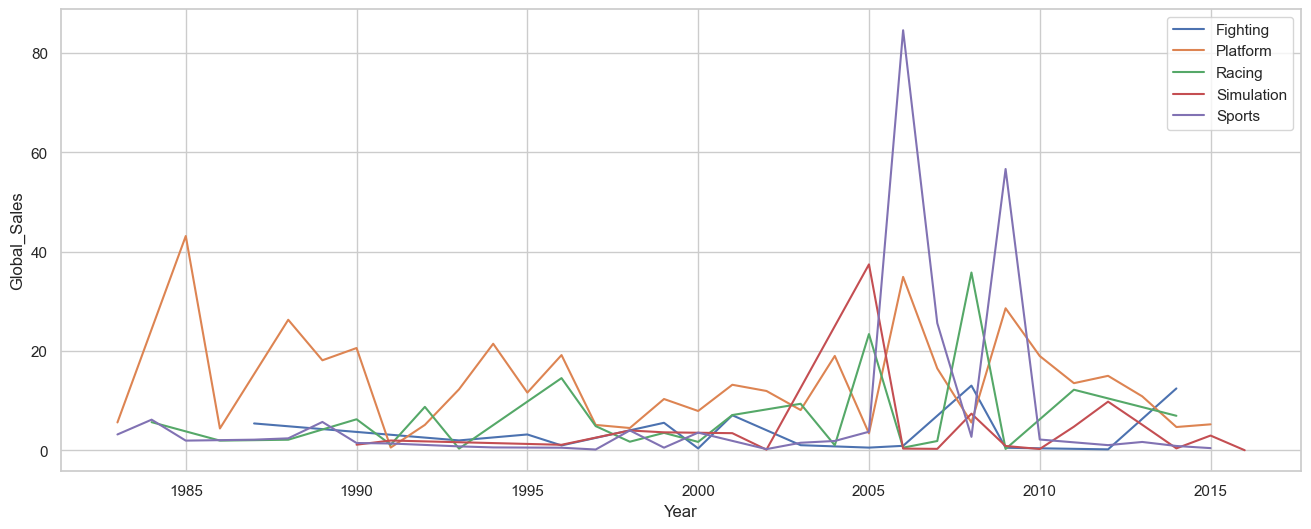

In [8]:
sns.lineplot(data=nin_year, x='Year', y='Global_Sales', hue='Genre')
plt.legend()

In [31]:
df.query('Publisher == Nintendo' and 'Genre == "Sports"').groupby('Year').agg({'Global_Sales': 'sum'}).idxmax()

Global_Sales    2009
dtype: int64

In [38]:
df.query('Publisher == Nintendo' and 'Genre == "Sports"').groupby('Year', as_index=False).agg({'Global_Sales': 'sum'})\
    .sort_values(by= 'Global_Sales', ascending=False)

,Year,Global_Sales
29,2009,138.52
26,2006,136.16
27,2007,98.20
28,2008,95.34
30,2010,92.53
22,2002,65.42
24,2004,63.68
25,2005,59.54
31,2011,56.99
23,2003,56.11
